# Neural Networks  
A neural network is a type of machine learning model inspired by the way our brain works. It's designed to recognize patterns and make decisions based on input data.

## What is a Neural Network?
A neural network is made up of neurons (nodes) that are organized in layers. These neurons work together to process data and make predictions. A neural network has three main types of layers:

- Input Layer: This is where the data enters the network. Each neuron here represents one feature of the data.
- Hidden Layers: These layers process the data and help the network learn. They are called "hidden" because we don't see the output directly; instead, they transform the input into something that can be used to make a decision.
- Output Layer: This is where the network gives its final result or prediction.

## How Does It Work?
A neural network learns by adjusting the connections (called weights) between the neurons. Here's how it works step-by-step:

1. Input Data: The data, like an image, text, or numbers, enters the network through the input layer.
2. Processing: The input data is passed through the hidden layers. Each neuron in these layers performs a calculation (often involving multiplication by weights and adding a bias) and applies an activation function to decide how much information to pass to the next layer.
3. Prediction: The final layer (output layer) produces a prediction or classification, like whether an image contains a cat or not.

## Learning and Training
To train a neural network, we need to feed it a lot of examples (called a dataset). During training, the network compares its predictions with the actual answers and adjusts the weights to improve its accuracy. This process is called backpropagation.

- Backpropagation works like this:

>The network makes a guess about the output.
It calculates the error (the difference between the predicted output and the actual answer).
The network adjusts the weights using this error to make its next prediction more accurate.
This process is repeated many times until the network becomes good at making predictions.

## Activation Functions
Neural networks use something called activation functions to decide whether a neuron should "fire" (send information to the next layer). The activation function is a mathematical equation that adds non-linearity to the model, helping it to learn complex patterns.

- Some common activation functions include:

    - Sigmoid: Outputs values between 0 and 1, often used in binary classification tasks.
    - ReLU (Rectified Linear Unit): Outputs the input value if it's positive, otherwise outputs 0. It's widely used because it's simple and works well in practice.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate input data for activation functions
x = np.linspace(-10, 10, 100)

$$
\text{ELU}(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha(\exp^x - 1) & \text{if } x \leq 0
\end{cases}
$$

where,
$\alpha$ is usually 1 but can be adjusted

In [3]:
def eul(x):
    if np.all(x > 0):
        return x
    else:
        return 1 * (np.exp(x) - 1 )

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


$$
f(x) = max(0, x)
$$

In [5]:
def relu(x):
    return np.maximum(0, x)


$$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

In [6]:
def tanh(x):
    return np.tanh(x)


$$
\text{Leaky ReLU}(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
$$


In [7]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$

In [8]:
def softmax(x):
    # Subtracting the max value for numerical stability (prevents overflow in exponentiation)
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

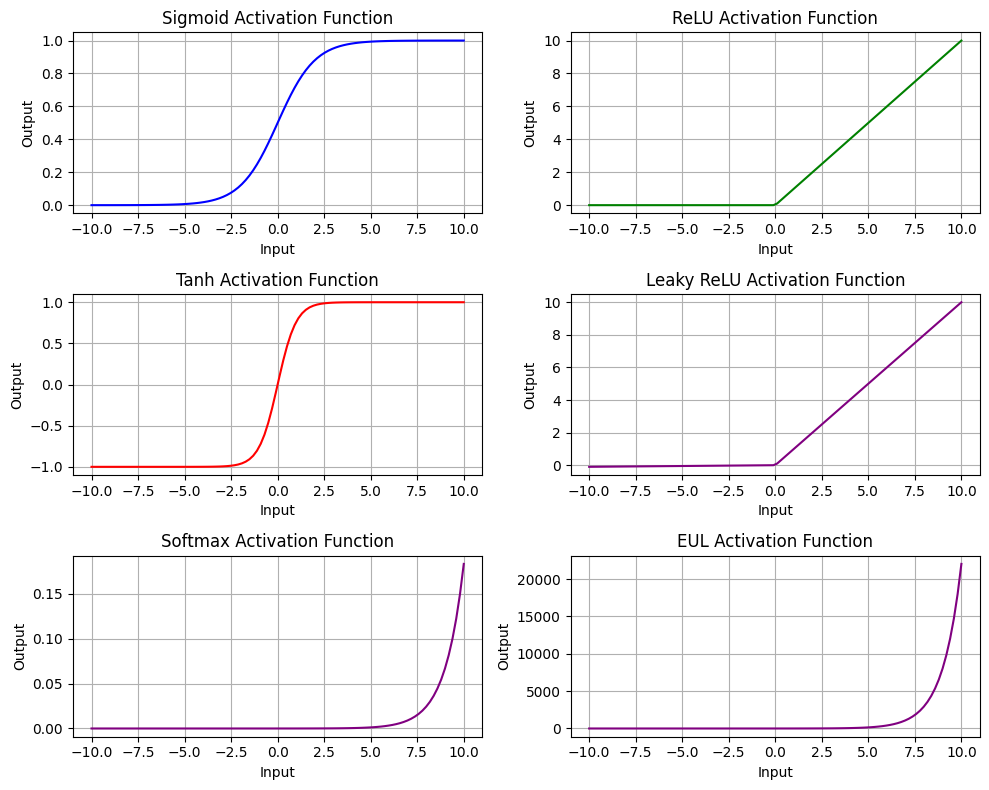

In [10]:
# Create subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Sigmoid
axes[0, 0].plot(x, sigmoid(x), label="Sigmoid", color="b")
axes[0, 0].set_title("Sigmoid Activation Function")
axes[0, 0].set_xlabel("Input")
axes[0, 0].set_ylabel("Output")
axes[0, 0].grid(True)

# ReLU
axes[0, 1].plot(x, relu(x), label="ReLU", color="g")
axes[0, 1].set_title("ReLU Activation Function")
axes[0, 1].set_xlabel("Input")
axes[0, 1].set_ylabel("Output")
axes[0, 1].grid(True)

# Tanh
axes[1, 0].plot(x, tanh(x), label="Tanh", color="r")
axes[1, 0].set_title("Tanh Activation Function")
axes[1, 0].set_xlabel("Input")
axes[1, 0].set_ylabel("Output")
axes[1, 0].grid(True)

# Leaky ReLU
axes[1, 1].plot(x, leaky_relu(x), label="Leaky ReLU", color="purple")
axes[1, 1].set_title("Leaky ReLU Activation Function")
axes[1, 1].set_xlabel("Input")
axes[1, 1].set_ylabel("Output")
axes[1, 1].grid(True)

# Softmax
axes[2, 0].plot(x, softmax(x), label="Softmax", color="purple")
axes[2, 0].set_title("Softmax Activation Function")
axes[2, 0].set_xlabel("Input")
axes[2, 0].set_ylabel("Output")
axes[2, 0].grid(True)

# EUL
axes[2, 1].plot(x, eul(x), label="EUL", color="purple")
axes[2, 1].set_title("EUL Activation Function")
axes[2, 1].set_xlabel("Input")
axes[2, 1].set_ylabel("Output")
axes[2, 1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# when to use what
1. Sigmoid
- Range [0, 1]
- when to use:
    - Binary Classification: Sigmoid is commonly used for binary classification problems where the output is a probability (e.g., "cat" vs. "dog", "yes" vs. "no"). It outputs a value between 0 and 1, which can be interpreted as a probability.
    - Output Layer of Binary Classifiers: Often used in the output layer for classification tasks with two classes (binary outcomes).
    - Probability Outputs: Since it maps any real-valued input to a range between 0 and 1, it can be interpreted as the probability of a particular class.
- Downside
    - Vanishing Gradient: In the extreme regions (very positive or negative inputs), the gradient becomes very small, which can slow down learning, especially in deep networks.
    - Not Zero-centered: Sigmoid outputs are always positive, which can cause issues in optimization and slow down convergence.

---

2. ReLU (Rectified Linear Unit)
- Range: [0, ∞]
- when to use
    - Hidden Layers in Deep Networks: ReLU is widely used in the hidden layers of deep neural networks, particularly for tasks like image classification, speech recognition, and other problems where the model needs to learn complex, non-linear patterns.
    - Training Speed: ReLU tends to speed up training due to its simplicity (it's computationally efficient) and less likely to suffer from the vanishing gradient problem compared to sigmoid and tanh.
- Downside
    - Dying ReLU Problem: If a large number of neurons output 0 (especially in the beginning stages of training), the model may stop learning for those neurons, effectively "dying." This can happen when the learning rate is too high or weights are initialized poorly.
    - Non-zero centered: Like sigmoid, ReLU outputs are not centered around 0, but this is less of an issue than with sigmoid.

---

3. Tanh (Hyperbolic Tangent)
- Range: [-1, 1]
- when to use
    - Hidden Layers: Tanh is sometimes used in the hidden layers when you need outputs that are centered around 0. This can help in reducing bias in the network, as the negative values balance out the positive ones.
    - Problems with Strong Negative Correlation: Tanh is better when dealing with data where negative outputs (such as "negative" or "less than 0") are important.
- Downside
    - Vanishing Gradient Problem: Like sigmoid, tanh can also suffer from the vanishing gradient problem for very high or low input values.
    - Computationally More Expensive: Tanh requires more computation than ReLU, which might slow down training for large models.

---

4. Leaky ReLU (Leaky Rectified Linear Unit)
- Range: (-∞, ∞)
- when to use
    - ReLU Problem Mitigation: Leaky ReLU is often used to address the "dying ReLU" problem by allowing a small negative slope for values less than 0.
    - Hidden Layers: Like ReLU, Leaky ReLU is commonly used in hidden layers of deep neural networks, especially when you want to ensure that all neurons continue to learn, even if their inputs are negative.
- Downside
    - Choosing α: If α is not tuned properly, it might still result in slower learning or not address the "dying" problem adequately.

---

5. Softmax
- Range: [0, 1] (Sum of outputs = 1)
- when to use
    - Multi-class Classification: Softmax is used in the output layer of neural networks for multi-class classification problems. It outputs a probability distribution across multiple classes.
    - Multi-class Output Layer: The sum of the outputs from the softmax function is 1, which makes it ideal for problems where each output is a probability.
- Downside
    - Computationally Expensive: For problems with many classes, the softmax function can be computationally expensive as it requires exponentiating all outputs.

**Summary**
- Use sigmoid for binary classification or when probability outputs are needed.
- Use ReLU for deep networks to speed up training, unless you have a problem with dying neurons.
- Use tanh when you need a centered output, especially if the data can have both positive and negative values.
- Use Leaky ReLU to address the dying ReLU problem.
- Use softmax for multi-class classification problems.


https://www.kaggle.com/code/mustafagnvar/mushroom-classification-with-rf-xgb

https://www.kaggle.com/datasets/uciml/mushroom-classification/data

# Neural Network

## Perceptron
A Perceptron Neural Network is one of the simplest types of artificial neural networks. It is a feedforward neural network that consists of a single layer of neurons (or nodes) without any hidden layers. The perceptron is the foundational building block of more complex neural networks and is used for binary classification problems.  
It has input layer, $\sum{x_iWi + \theta_i}$, and a activation function

---

**Limitation**
1. Linear Separability:
   - A perceptron can only solve problems that are linearly separable, meaning that the data can be separated by a single straight line (in 2D) or a hyperplane (in higher dimensions).
  
2. Lack of Hidden Layers

## A Multi-Layer Perceptron (MLP)
A Multi-Layer Perceptron (MLP) is a type of artificial neural network (ANN) that consists of multiple layers of neurons, enabling it to model complex, non-linear relationships. Unlike a single-layer perceptron, which can only solve linearly separable problems, an MLP can solve non-linear problems thanks to its hidden layers and non-linear activation functions.

It has input layer, hidden layer (w/ activation function) and a output layer  

---

**Feature**
1. Non-Linearity
2. Fully Connected

--

**Limitation**
1. Traning Complexity
2. Overfitting
3. Vanishing Gradient:

## Fully Connected NN
This means that every neuron in one layer is connected to every neuron in the next layer. These fully connected layers are sometimes referred to as dense layers.

**Why Fully Connected?**
1. Learning General Patterns:
    - Fully connected layers allow each neuron in a layer to receive information from all the neurons in the previous layer. This ensures that the network can learn from all possible interactions between features, which is critical for many tasks.

2. Basic Definition:
    - The term "multi-layer perceptron" historically implies a dense connection structure
  
**When an MLP May Not Be Fully Connected:**
1. Dropout Regularization
2. Pruned Networks
3. Sparse Networks

![Feed Forward NN](../images/XOR_nn.png)

In [284]:
# Define the activation function (Sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [285]:
def sigmoid_derivative(x):
    return x * (1 - x)
    # return sigmoid(x) * (1 - sigmoid(x))

In [286]:
# Input data and target labels
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR inputs
y = np.array([[0], [1], [1], [0]])              

In [287]:
# Initialize weights and biases
np.random.seed(42)  # For reproducibility
weights_input_hidden = np.random.rand(2, 2)    # 2 input neurons, 2 hidden neurons
weights_hidden_output = np.random.rand(2, 1)   # 2 hidden neurons, 1 output neuron
bias_hidden = np.random.rand(1, 2)             # 1 bias for each hidden neuron
bias_output = np.random.rand(1, 1)   

In [288]:
weights_input_hidden

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848]])

In [289]:
weights_hidden_output

array([[0.15601864],
       [0.15599452]])

In [290]:
bias_hidden

array([[0.05808361, 0.86617615]])

In [291]:
bias_output

array([[0.60111501]])

## Feed Forward NN

In [292]:
learning_rate = 0.1

In [293]:
# Forward pass
hidden_input = np.dot(X, weights_input_hidden) + bias_hidden  # Input to hidden layer
hidden_input

array([[0.05808361, 0.86617615],
       [0.79007755, 1.46483463],
       [0.43262373, 1.81689045],
       [1.16461767, 2.41554894]])

In [294]:
hidden_output = sigmoid(hidden_input)                        # Output from hidden layer
hidden_output

array([[0.51451682, 0.70394941],
       [0.68784798, 0.81227101],
       [0.60650002, 0.86019259],
       [0.76217076, 0.91800533]])

In [295]:
final_input = np.dot(hidden_output, weights_hidden_output) + bias_output  # Input to output layer
final_input                          

array([[0.79120148],
       [0.83514194],
       [0.82992565],
       [0.86323166]])

In [296]:
predicted_output = sigmoid(final_input)         

In [297]:
predicted_output

array([[0.68808925],
       [0.69744107],
       [0.69633921],
       [0.7033354 ]])

In [298]:
(predicted_output > .5).astype(int)

array([[1],
       [1],
       [1],
       [1]])

# Feedback NN

In [299]:
# Training loop
np.random.seed(42)  # For reproducibility
learning_rate = 0.1
for epoch in range(10000):  # Number of iterations
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(final_input)
    
    # Backpropagation
    error = y - predicted_output
    d_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Calculate and print mean squared error (MSE) every 100 epochs
    if epoch % 100 == 0:
        mse = np.mean(np.square(error))  # Mean Squared Error
        print(f'Epoch: {epoch}/{10000} [==============================] - MSE: {mse:.2e}')
    
    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

Epoch: 0/10000 [==============================] - MSE: 2.88e-01
Epoch: 100/10000 [==============================] - MSE: 2.51e-01
Epoch: 200/10000 [==============================] - MSE: 2.50e-01
Epoch: 300/10000 [==============================] - MSE: 2.50e-01
Epoch: 400/10000 [==============================] - MSE: 2.50e-01
Epoch: 500/10000 [==============================] - MSE: 2.50e-01
Epoch: 600/10000 [==============================] - MSE: 2.50e-01
Epoch: 700/10000 [==============================] - MSE: 2.50e-01
Epoch: 800/10000 [==============================] - MSE: 2.50e-01
Epoch: 900/10000 [==============================] - MSE: 2.50e-01
Epoch: 1000/10000 [==============================] - MSE: 2.49e-01
Epoch: 1100/10000 [==============================] - MSE: 2.49e-01
Epoch: 1200/10000 [==============================] - MSE: 2.49e-01
Epoch: 1300/10000 [==============================] - MSE: 2.49e-01
Epoch: 1400/10000 [==============================] - MSE: 2.49e-01
Epoch: 

In [300]:
# Print final output
print("Final predicted output:")
print(predicted_output)

Final predicted output:
[[0.06029012]
 [0.94447222]
 [0.944367  ]
 [0.05997169]]


In [301]:
(predicted_output > .5).astype(int)

array([[0],
       [1],
       [1],
       [0]])

# Sklearn Perceptron

In [302]:
from sklearn.linear_model import Perceptron

## AND

In [303]:
# Input data and target labels
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR inputs
y = np.array([0, 0, 0, 1])   

In [304]:
clf = Perceptron(random_state=42)
clf = clf.fit(X, y)

In [305]:
clf.predict(X)

array([0, 0, 0, 1])

## XOR

In [306]:
# Input data and target labels
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR inputs
y = np.array([0, 1, 1, 0])              

In [307]:
clf = Perceptron(random_state=42)
clf = clf.fit(X, y.reshape(4,))

In [308]:
clf.predict(X)

array([0, 0, 0, 0])

In [309]:
from sklearn.neural_network import MLPClassifier

In [310]:
mlp = MLPClassifier(hidden_layer_sizes=(4,2),  # 2 neurons in the hidden layer
                    activation='tanh',        # tanh activation for hidden layer
                    max_iter=10000,           # Maximum iterations for training
                    random_state=42)
mlp

MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 2), max_iter=10000,
              random_state=42)

In [311]:
mlp = mlp.fit(X, y)

In [312]:
mlp.predict(X)

array([0, 1, 1, 0])

# Vanishing Gradient
The vanishing gradient problem refers to a challenge encountered during the training of deep neural networks, particularly when using gradient-based optimization methods like backpropagation. It occurs when the gradients (i.e., the partial derivatives of the loss function with respect to the network's parameters) become very small as they are propagated backward through the layers of the network

**Why does it happen?**
Activation functions: Some activation functions, such as sigmoid and tanh, can cause the gradients to shrink exponentially as they are propagated backward. This happens because these functions have very small gradients for large positive or negative inputs. For example:
    
- The sigmoid function has an output range of 0 to 1 and its derivative is largest at x = 0, becoming very small as the input moves further away from zero.
- The tanh function has a range of −1 to 1 and its derivative can also become very small for large values of the input.

Deep networks: In deep networks, the error (or loss) needs to be backpropagated through many layers to update the weights. If the gradients become too small in the earlier layers (the ones closest to the input), these layers will not learn effectively because the updates to their weights will be very small or vanish altogether.

**What happens during backpropagation?**
- When the gradients are backpropagated from the output layer toward the input layer, they are multiplied by the derivative of the activation function at each layer.
- If the derivative is small (as it is with sigmoid or tanh), the gradients keep getting smaller as they move backward through the layers.
- As a result, the updates to the weights in the earlier layers (those closer to the input) become extremely small, and these layers stop learning effectively. This is the vanishing gradient problem.


In [313]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [314]:
print(sigmoid(0))
sigmoid_der(0)

0.5


np.float64(0.25)

In [315]:
print(sigmoid(1111110))
sigmoid_der(1111110)

1.0


np.float64(0.0)

# Initialization of Weights
---
1. Random
   - Random initialization involves setting the weights to small random values. This is the most basic method, but care must be taken to avoid very large or very small values that could lead to issues during training.
    - $W \sim Uniform(-e, e)$
    - $W \sim N(0, \sigma^2)$
    - e is a small value and $\sigma$ is a very small standard deviation
2. Xavier/Glorot Initialization
   - Xavier Initialization (also called Glorot Initialization) is designed to work well with activation functions like sigmoid and tanh, which are sensitive to the scale of the input.
    - Fromula
        - $W \sim Uniform(-\sqrt{\frac{6}{n_{in} + n {out}}}, \sqrt{\frac{6}{n_{in} + n {out}}})$
        - $W \sim N(0, \frac{2}{n_{in} + n_{out}})$
    - Where:
        - $n_{in}$ is the number of input units to the layer.
        - $n_{out}$ is the number of out units to the layer.
    - Key Points:
        - Xavier Initialization is ideal for activation functions like sigmoid and tanh because it helps to keep the variance of activations consistent across layers.
        - It works well for shallow networks or networks with activation functions that aren't prone to gradient issues.

3. He Initialization:
    - He Initialization is a modification of Xavier initialization that is specifically designed for ReLU and its variants (e.g., Leaky ReLU, ELU), which have a tendency to saturate for negative inputs and lead to issues with vanishing gradients.
    - He initialization accounts for the fact that ReLU activations can squash half of the inputs to zero (i.e., negative values are mapped to zero). As a result, a higher variance is used for the weights to compensate for this.
    - Formula
        - $W \sim N(0, \frac{2}{n_{in}})$
        - $W \sim Uniform(-\sqrt{\frac{6}{n_{in}}}, \sqrt{\frac{6}{n_{in}}})$
    - Key Points:
        - He Initialization is ideal for layers with ReLU and its variants because it compensates for the zeroing-out of half of the inputs during the activation.
        - Helps to prevent the vanishing gradient problem in deep networks with ReLU.
4. LeCun Initialization
    - LeCun Initialization is specifically designed for Leaky ReLU and ELU activations. It is similar to He Initialization but uses a different scaling factor for the variance.
    - Fromula
        - $W \sim N(0, \frac{1}{n_{in}})$
        - $W \sim Uniform(-\sqrt{\frac{3}{n_{in}}}, \sqrt{\frac{3}{n_{in}}})$
    - Key Points:
        - LeCun Initialization works well for activations like Leaky ReLU and ELU, which are often used in deep networks.
        - Ensures that the network learns efficiently even in very deep networks.

In [2]:
!du -sh ../venv

2.8G	../venv


**Summary of Initialization Strategies**
- Sigmoid/Tanh: Use Xavier/Glorot Initialization.
- ReLU/Leaky ReLU: Use He Initialization.
- Leaky ReLU/ELU: Use LeCun Initialization.


**Bias Init**
- Usually init to 0
- But sometime init to very small value

# Loss Function

Loss functions are one of the most important aspects of neural networks, as they (along with the optimization functions) are directly responsible for fitting the model to the given training data.

A loss function is a function that compares the target and predicted output values; measures how well the neural network models the training data. When training, we aim to minimize this loss between the predicted and target outputs.


---

1. Mean Squared Error (MSE)
   $$
   MSE = \frac{1}{n}\sum{(y^i - \hat{y^i})}^2
   $$
   >One disadvantage of this loss function is that it is very sensitive to outliers; if a predicted value is significantly greater than or less than its target value, this will significantly increase the loss.

2. Mean Absolute Error (MAE)
$$
   MSE = \frac{1}{n}\sum{|y^i - \hat{y^i}|}
   $$
   >MAE is used in cases when the training data has a large number of outliers to mitigate this.
   >It also has some disadvantages; as the average distance approaches 0, gradient descent optimization will not work, as the function's derivative at 0 is undefined (which will result in an error, as it is impossible to divide by 0)

3. Huber Loss
    - Combines MAE and MSE 
$$
\text{Huber Loss} = \begin{cases} 
\frac{1}{2}a^2 & \text{if } |a| \leq \delta \\
\delta(|a| - \frac{1}{2}\delta) x & \text{if } |a| > \delta
\end{cases}
$$
    - a = $y - \hat{y}$   

4. Binary Cross-Entropy
    - This is the loss function used in binary classification models
    - In binary classification, there are only two possible actual values of y — 0 or 1. Thus, to accurately determine loss between the actual and predicted values, it needs to compare the actual value (0 or 1) with the probability that the input aligns with that category (p(i) = probability that the category is 1; 1 — p(i) = probability that the category is 0)

$$
   CE Loss = \frac{1}{n}\sum{-(y_{i}.log(p_{i}) + (1 - y_{i}).log(1 - p_{i}))}
   $$

5. Categorical Cross-Entropy Loss
   - In cases where the number of classes is greater than two, we utilize categorical cross-entropy — this follows a very similar process to binary cross-entropy.